In [1]:
import tensorflow as tf
import os
os.environ ['CUDA_VISIBLE_DEVICES'] ="0"
gpus= tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)


In [2]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

In [3]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [4]:
from keras.models import load_model
model = load_model('cats_and_dogs_small_1.h5')

In [5]:
import os, shutil

# The path to the directory where the original
# dataset was uncompressed
#/Users/fchollet/Downloads/kaggle_original_data
original_dataset_dir = r'D:\dogandcat\cat-and-dog'

# The directory where we will
# store our smaller dataset
base_dir = r'D:\dogandcat\cad'
os.mkdir(base_dir)#创建一个新的目录
# Directories for our training,我们的培训目录，
# validation and test splits验证和测试分割
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)


FileExistsError: [WinError 183] 当文件已存在时，无法创建该文件。: 'D:\\dogandcat\\cad'

In [ ]:
# #在训练路径上加猫和狗
# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

#在验证集目录上添加猫和狗
# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

#在测试集路径上添加猫和狗的路径
# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

original_dog=r'D:\dogandcat\cat-and-dog\training_set\training_set\dogs'
original_cat=r'D:\dogandcat\cat-and-dog\training_set\training_set\cats'
##收集猫和狗的数据将前 1000 张猫的图像复制到 train_cats_dir
# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1,1000)]
for fname in fnames:
    src = os.path.join(original_cat, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_cat, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_cat, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1,1000)]
for fname in fnames:
    src = os.path.join(original_dog, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dog, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dog, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [6]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training cat images:', len(os.listdir(test_cats_dir)))
print('total training cat images:', len(os.listdir(validation_cats_dir)))


NameError: name 'train_cats_dir' is not defined

In [7]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [9]:

from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [10]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_dir=r'D:\dogandcat\cad\train'
validation_dir=r'D:\dogandcat\cad\validation'
train_generator = train_datagen.flow_from_directory(
        # This is the target directory他的是目标目录
        train_dir,
        # All images will be resized to 150x150所有图像将被调整为150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels因为我们使用了binary_crossentropy损耗，所以我们需要二进制标签
        class_mode='binary')
    
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1998 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [12]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 51s 512ms/step - loss: 0.6864 - acc: 0.5425 - val_loss: 0.7211 - val_acc: 0.5650
Epoch 2/30
100/100 [==============================] - 6s 60ms/step - loss: 0.6499 - acc: 0.6171 - val_loss: 0.5732 - val_acc: 0.6220
Epoch 3/30
100/100 [==============================] - 6s 59ms/step - loss: 0.5957 - acc: 0.6822 - val_loss: 0.5492 - val_acc: 0.6660
Epoch 4/30
100/100 [==============================] - 6s 60ms/step - loss: 0.5631 - acc: 0.7067 - val_loss: 0.6342 - val_acc: 0.6550
Epoch 5/30
100/100 [==============================] - 6s 61ms/step - loss: 0.5352 - acc: 0.7342 - val_loss: 0.4712 - val_acc: 0.6750
Epoch 6/30
100/100 [==============================] - 6s 62ms/step - loss: 0.5068 - acc: 0.7533 - val_loss: 0.6935 - val_acc: 0.6780
Epoch 7/30
100/100 [==============================] - 6s 65ms/step - loss: 0.4736 - acc: 0.7788 - val_loss: 0.5958 - val_acc: 0.6390
Epoch 8/30
100/100 [==============================] - 7s 66ms/step 

In [19]:
model.save('cats_and_dogs_small_0.h5')

In [20]:
from keras.models import load_model
model = load_model('cats_and_dogs_small_1.h5')

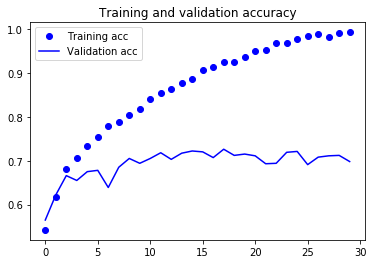

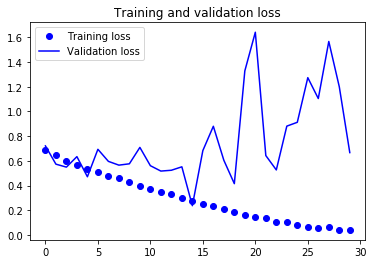

In [21]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [22]:
datagen = ImageDataGenerator(
  rotation_range=40,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,
  fill_mode='nearest')

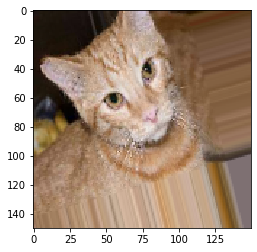

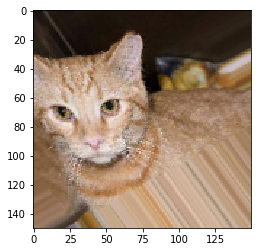

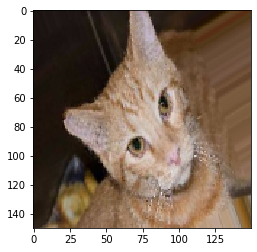

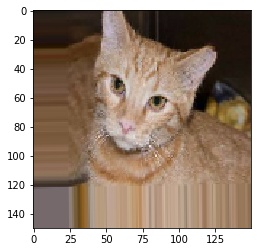

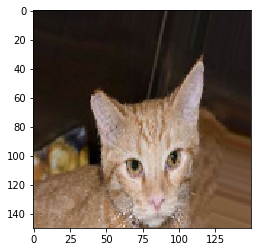

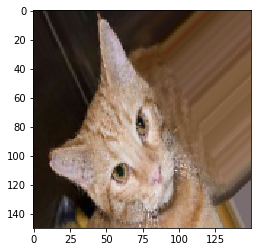

In [23]:
import os
train_cats_dir=r'D:\dogandcat\cad\train\cats'
# This is module with image preprocessing utilities
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# We pick one image to "augment"
img_path = fnames[45]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# 下面的.flow()命令生成一批随机转换的图像。
#它将无限循环，所以我们需要在某个点上“打破”这个循环!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 6 == 0:
        break

plt.show()

In [24]:
#　定义一个包含 dropout 的新卷积神经网络
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
#　利用数据增强生成器训练卷积神经网络
train_datagen = ImageDataGenerator(
   # 重新调节
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!注意，验证数据不应该被增强
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        #因为我们使用了binary_crossentropy损耗，所以我们需要二进制标签
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 1998 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 23s 234ms/step - loss: 0.6928 - acc: 0.5152 - val_loss: 0.6841 - val_acc: 0.6155
Epoch 2/100
100/100 [==============================] - 22s 219ms/step - loss: 0.6786 - acc: 0.5613 - val_loss: 0.6508 - val_acc: 0.6076
Epoch 3/100
100/100 [==============================] - 22s 221ms/step - loss: 0.6633 - acc: 0.5907 - val_loss: 0.6389 - val_acc: 0.6320
Epoch 4/100
100/100 [==============================] - 22s 217ms/step - loss: 0.6422 - acc: 0.6266 - val_loss: 0.6111 - val_acc: 0.6398
Epoch 5/100
100/100 [==============================] - 21s 211ms/step - loss: 0.6300 - acc: 0.6375 - val_loss: 0.4826 - val_acc: 0.6624
Epoch 6/100
 48/100 [=============>................] - ETA: 10s - loss: 0.6207 - acc: 0.6432

In [ ]:
model.save('cats_and_dogs_small_2.h5')

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()